Importing Libraries

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.metrics import silhouette_score,v_measure_score
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random
sns.set()

Reading Data

In [278]:
X,y = load_iris(return_X_y = True)

<AxesSubplot:>

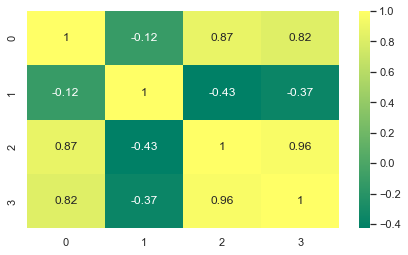

In [461]:
plt.figure(figsize=(7,4))
sns.heatmap(pd.DataFrame(X).corr(),annot=True,cmap='summer')

Exploratory Data Analysis

In [235]:
# pca = PCA(n_components=2)
# X = pca.fit_transform(X)


In [279]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Silhoutte Score

In [439]:
ss = []
for k in [2,3,4,5,6,7,8,9,10]:
  cluster_labels,centroids = KMeans(X,k,10)
  score = silhouette_score(X, cluster_labels, metric='cosine')
  print(k,":",score)
  ss.append(score)


2 : 0.9420500632623174
3 : 0.7165084634433058
4 : -0.2769915893531754
5 : 0.016452727455989868
6 : -0.04556411597080674
7 : -0.17671145704367716
8 : -0.16536098501637744
9 : -0.11798374550033498
10 : -0.1653413002952235


Plotting the silhoette score against all cluster vlaues

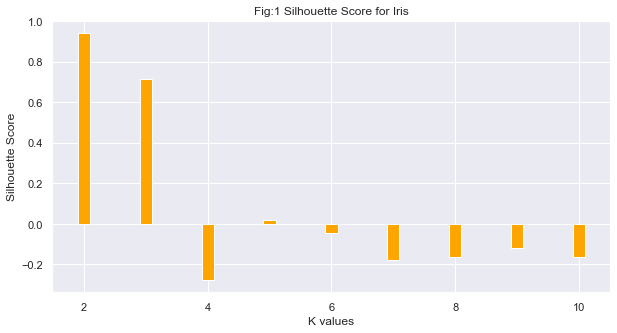

In [458]:
fig = plt.figure(figsize = (10, 5))
plt.title("Fig:1 Silhouette Score for Iris") 
plt.xlabel('K values')
plt.ylabel('Silhouette Score')
plt.bar([2,3,4,5,6,7,8,9,10],ss, width = 0.2, color = 'orange')
plt.show()

Kmean Algorithm

In [281]:
def KMeans(X,k,n):    
    cluster = np.zeros(X.shape[0])
    centroids = X[random.sample(range(0, X.shape[0]-1), k), :]
    d = 1
    while d != 0:
        for i, data in enumerate(X):
            dist = []
            for i in range(k):
                d1 = (data[0] - centroids[i][0]) ** 2
                d2 = (data[1] - centroids[i][1]) ** 2
                d3 = (data[2] - centroids[i][2]) ** 2
                d4 = (data[3] - centroids[i][3]) ** 2
                dist.append(np.sqrt(d1+d2+d3+d4))
            cluster[i] = dist.index(min(dist))
        nc = pd.DataFrame(X).groupby(by=cluster).mean().values
        if np.count_nonzero(centroids-nc) == 0:
            d = 0
        else:
            centroids = nc
        return cluster, centroids

Kmeans ++ 

In [269]:
def KMeans_plus(X,k,n):
    i=random.randint(0,X.shape[0])
    centroid=np.array([X.iloc[i, :]])
    K=3
    for k in range(1,K):
        D=np.array([]) 
        for x in X:
            D=np.append(D,np.min(np.sum((x-centroid)**2)))
        p=D/np.sum(D)
        cummulative_prob=np.cumsum(p)
        r=random.random()
        i=0
        for j,p in enumerate(cummulative_prob):
            if r<p:
                i=j
                break
        centroid=np.append(centroid,[X.iloc[i, :]],axis=0)
    
    centroid = pd.DataFrame(centroid)
    d = 1
    count = 0
    while d != 0:
        for idx, data in X.iterrows():
            distance = []
            for c, centroid in centroid.iterrows():
                d1 = (data[0] - centroid[0]) ** 2
                d2 = (data[1] - centroid[1]) ** 2
                d3 = (data[2] - centroid[2]) ** 2
                d4 = (data[3] - centroid[3]) ** 2
                distance.append(np.sqrt(d1+d2+d3+d4))
            cluster[idx] = distance.index(min(distance))
        nc = pd.DataFrame(X).groupby(by=cluster).mean().values
        if np.count_nonzero(centroid-nc) == 0:
            d = 0
        else:
            centroid = pd.DataFrame(nc)
        return cluster, centroid

V Score

In [488]:
cluster,centroids = KMeans(X,3,10)
print(v_measure_score(y,cluster))

0.633406434735719
